In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1 Data Acquisition
* Load the training data for the digits `['four', 'five', 'six', 'seven']`.

In [2]:
import lib_digit as lib

lib.rel_thresh = 0.5
lib.min_length = 0.25 # 250ms
lib.frames_select = 6

PATH = './Digits Lab Course 5'
x_train, t_train, x_test, t_test, val_split = lib.load_dataset(PATH, digits=['four', 'five', 'six', 'seven'])

four:   0%|                                        | 0/2372 [00:00<?, ?files/s]

five:   0%|                                        | 0/2357 [00:00<?, ?files/s]

six:   0%|                                         | 0/2369 [00:00<?, ?files/s]

seven:   0%|                                       | 0/2377 [00:00<?, ?files/s]

* Select one instance (dictionary) from the training set and display the dimensions of all contained features by iterating over the keys.

In [3]:
data = x_train[0]
print(data.keys())
for key in x_train[0].keys():
    print(data[key].shape)

dict_keys(['log_mel', 'mfcc'])
(128, 6)
(30, 6)


* Create a FeatureSelector object and use it to generate a matrix mel_train where one row corresponds to the flattened log mel spectrum of one training instance.

In [4]:
fSelector = lib.FeatureSelector(0, 'all')
mel_train = fSelector.transform(x_train)
print(mel_train.shape)

(5130, 768)


* How many features does one instance have?

In [5]:
mel_train.shape[1]

768

* Use the same object to generate a matrix mel_test containing the test data.

In [6]:
mel_test = fSelector.transform(x_test)

### Exercise 2 Logistic Regression 
* Create a logistic regression object with C=1000 and max_iter=1000.
* Train the model with the extracted training data (mel spectra). Probably you will receive a warning that the training did not converge.

In [7]:
from sklearn.linear_model import LogisticRegression
linreg = LogisticRegression(C=1000, max_iter=1000)
linreg.fit(mel_train, t_train)

d:\programme\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000, max_iter=1000)

### Exercise 3 Model Evaluation
* Compute all predicted posterior probabilities on the test set and then plot $p(\texttt{’four’}|\mathbf{x})$ for all x in the test set.
* In the same diagram add a line with the true posterior probability p(’four’|x).
This probability is 1 if it is known that an instance is a 'four' and zero otherwise.

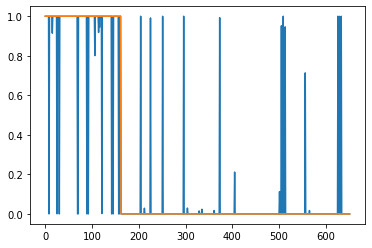

In [8]:
post_prob = linreg.predict_proba(mel_test)
plt.plot(post_prob[:, 0])
true_post_prob = [1 if elem == 4 else 0 for elem in t_test]
plt.plot(true_post_prob)
plt.show()

* In another diagram, generate the same curves for the training set. Is the training data linearly separable?


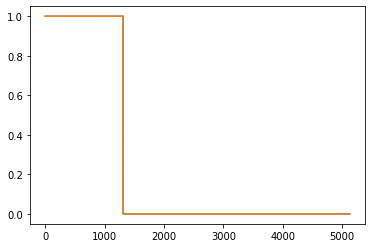

Yes it is linearly separable


In [9]:
post_prob = linreg.predict_proba(mel_train)
plt.plot(post_prob[:, 0])
true_post_prob = [1 if elem == 4 else 0 for elem in t_train]
plt.plot(true_post_prob)
plt.show()

print('Yes it is linearly separable')

* Visualize the normalized confusion matrix for the test set. Which false classification happens most often?

the 5 gets most often wrongly classified as 7


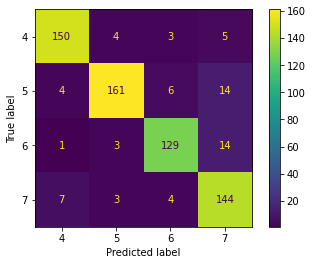

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(linreg, mel_test, t_test)
print('the 5 gets most often wrongly classified as 7')

* Create a Pipeline with a `FeatureSelector` and a `LogisticRegression` object. Let
the `FeatureSelector` select only the log-mel-spectra and allow 1000 iterations
for the `LogisticRegression` object. Set the `Pipeline`’s `verbose` attribute to `True`
in order to see the fitting time.
* Fit the `Pipeline` with the training data and compute the accuracy score on the test set.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
pipe = Pipeline([('selector', lib.FeatureSelector(0, 'all')),
                 ('model', LogisticRegression(max_iter=1000))])
pipe.verbose = True
pipe.fit(x_train, t_train)
pipe.score(x_test, t_test)

[Pipeline] .......... (step 1 of 2) Processing selector, total=   0.5s
[Pipeline] ............. (step 2 of 2) Processing model, total=  32.3s


d:\programme\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.901840490797546

* Then add a `StandardScaler` to the `Pipeline` and compare accuracy and fitting time.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
pipe = Pipeline([('selector', lib.FeatureSelector(0, 'all')), ('scaler', StandardScaler()),
                 ('model', LogisticRegression(max_iter=1000))])
pipe.verbose = True
pipe.fit(x_train, t_train)
pipe.score(x_test, t_test)

[Pipeline] .......... (step 1 of 3) Processing selector, total=   0.6s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing model, total=  17.5s


0.906441717791411

* Repeat these steps but let the FeatureSelector select all cepstral coefficients.

In [13]:
pipe = Pipeline([('selector', lib.FeatureSelector('all', 0)),
                 ('model', LogisticRegression(max_iter=1000))])
pipe.verbose = True
pipe.fit(x_train, t_train)
pipe.score(x_test, t_test)

[Pipeline] .......... (step 1 of 2) Processing selector, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.9s


d:\programme\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9003067484662577

In [14]:
pipe = Pipeline([('selector', lib.FeatureSelector('all', 0)), ('scaler', StandardScaler()),
                 ('model', LogisticRegression(max_iter=1000))])
pipe.verbose = True
pipe.fit(x_train, t_train)
pipe.score(x_test, t_test)


[Pipeline] .......... (step 1 of 3) Processing selector, total=   0.3s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   1.0s


0.9079754601226994

* Denote accuracy and fitting times in the following table. How do scaler and the reduced number of features impact the pipeline?

| Feature 	| With Scaler 	| Fitting Time [s]	| Accuracy [%]	|
|---------	|-------------	|----------------	|-----------	|
| log_mel 	| no          	| 22.9          	| 89.88      	|
| log_mel 	| yes         	| 29.4              | 90.34      	|
| mfcc    	| no          	| 11.7              | 89.72      	|
| mfcc    	| yes         	| 0.9               | 90.49      	|


### Exercise 5: Grid Search

* Create a Pipeline with cepstral coefficiens as input features, standard scaling
and logistic regression with a maximum of 1000 iterations.

* Define a parameter grid where you vary the regularization parameter `C` of the
estimator in an exponential range from $10^{−5}$ to $10^5$ and the number of selected
cepstral coefficients between 2 and 30 in steps in 4.

Fitting 1 folds for each of 28 candidates, totalling 28 fits


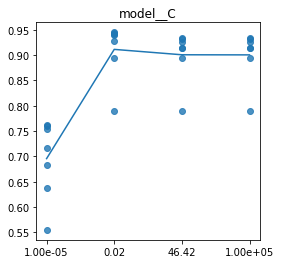

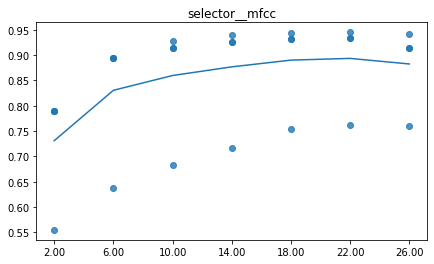

In [15]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[('selector', lib.FeatureSelector(mfcc='all', log_mel = 0)), ('scaler', StandardScaler()),
                 ('model', LogisticRegression(max_iter=1000))])
pipe.verbose = False
parameters = {'model__C': np.logspace(-5, 5, 4),
              'selector__mfcc': np.arange(2, 30, 4)}
clf = GridSearchCV(estimator=pipe, param_grid=parameters, cv=val_split, verbose=True)
clf.fit(x_train, t_train)
lib.analyze_grid_search(clf)

### Exercise 6: Dimensionality Reduction
* Create a `Pipeline` with a `FeatureSelector` and a `KNeighborsClassifier`. The
`FeatureSelector` should select the mel-frequency spectrum. Fit the `Pipeline`
and display the accuracy on the test set.

In [16]:
from sklearn.neighbors import  KNeighborsClassifier
pipe = Pipeline(steps=[('selector', lib.FeatureSelector(mfcc=0, log_mel = 'all')),
                       ('model', KNeighborsClassifier())])
pipe.fit(x_train, t_train)
score = pipe.score(x_test, t_test)
print(score)

0.9079754601226994


* Now create a second `Pipeline`, where a `NeighborhoodComponentAnalysis` is added
before the classifier, and provide a memory argument, so that the `Pipeline` is able to cache fitted estimators.
* Create a parameter grid where you vary `nca__n_components` (4-5 values) and
`knn__n_neighbors` (5-8 values).
* Create a `GridSearchCV` with the Pipeline, the parameter grid and the argument
`verbose=3.`
* Fit the grid search and investigate the fitting time for the parameter configurations.
How can you observe the effect of caching?

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
pipe2 = Pipeline(steps=[('selector', lib.FeatureSelector(mfcc=0, log_mel = 'all')),
                        ('nca', NeighborhoodComponentsAnalysis(verbose=0)),
                        ('knn', KNeighborsClassifier())], memory='steps')
parameters = {'nca__n_components': [2, 5],
              'knn__n_neighbors': [1, 2, 5]}
clf = GridSearchCV(estimator=pipe2, param_grid=parameters, cv=val_split, verbose=3, n_jobs=-1)
clf.fit(x_train, t_train)

Fitting 1 folds for each of 6 candidates, totalling 6 fits


### Exercise 7

### Exercise 8
* Your turn!